In [424]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

df= pd.read_csv("survey_results_public.csv")

In [425]:
import os
os.getcwd()

'/home/noob/Desktop/streamlit/new proj'

In [426]:
from platform import python_version
print(python_version())

3.8.13


In [427]:
df['EdLevel'].fillna('Something else', axis=0, inplace=True)

In [428]:
 df.drop(['US_State', 'UK_Country', 'ResponseId', 'CompTotal'], axis=1, inplace=True)

In [429]:
df['Country'] = df['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'United Kingdom')

In [430]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)

In [431]:
df = df[df['Country'].isin(['Slovakia', 'Netherlands','Russian Federation', 'Austria', 'United Kingdom',
                           'Sweden','Spain','Germany','France', 'Switzerland', 'Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece',
                           'Ireland','Hungary', 'Belgium','Albania','Romania','Lithuania', 'Slovenia','Croatia','Czech Republic','Denmark',
                            'Serbia','Estonia','Finland','Bosnia and Herzegovina','Norway','Belarus','Luxembourg','Malta','Cyprus',
                            'Latvia','Iceland','Republic of Moldova','Montenegro','Monaco','Liechtenstein'])]

In [432]:
df.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,Salary
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [433]:
df = df[['EdLevel','Country', 'YearsCodePro',"Employment", 'Age','Age1stCode', 'DevType', 'LanguageHaveWorkedWith', 'OrgSize', 'OpSys', 'Salary']]

In [434]:
df = df[df["Employment"]== "Employed full-time"]

In [435]:
df = df.dropna()

In [436]:
df = df[df["Salary"] <=250000]
df = df[df["Salary"] >= 10000]

In [437]:
def experience(x):
    if x == 'More than 50 years':
        return 55
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(experience)

In [438]:
def education (x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

df["EdLevel"] = df['EdLevel'].apply(education)

In [439]:
df.DevType.unique()

array(['Data scientist or machine learning specialist',
       'Developer, back-end',
       'Developer, desktop or enterprise applications;Developer, back-end',
       ..., 'Developer, full-stack;Engineer, data;Scientist;Designer',
       'Developer, back-end;Database administrator;DevOps specialist;Product manager',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator'],
      dtype=object)

In [440]:
def dev_type(x):
    if 'full-stack' in x:
        return 'full-stack Developer'
    if 'back-end' in x:
        return 'back-end Developer'
    if 'front-end' in x:
        return 'front-end Developer'
    if 'mobile' in x:
        return 'Mobile Developer'
    if 'DevOps' in x: 
        return 'DevOps Specialist'
    if 'Data scientist' in x:
        return 'Data Scientist or ML Specialist'
    if 'Data engineer' in x:
        return 'Data Engineer'
    if 'analyst' in x:
        return 'Data or Business Analyst'
    if 'game' in x:
        return 'Game Developer'
    if 'QA' in x:
        return 'QA tester'
    if 'researcher' in x:
        return 'Academic Reseacher'
    if 'Senior Executive' in x:
        return 'Senior Executive'
    if 'System administrator' in x:
        return 'System Administrator'
    if 'reliability' in x:
        return 'Engineer, Site Reliability'
    if 'Product manager' in x:
        return 'Product Manager'
    if 'Database' in x:
        return 'Database Administrator'
    if 'Engineering manager' in x:
        return 'Engineering Manager'
    

df['DevType'] = df['DevType'].apply(dev_type)

In [441]:
df.DevType.unique()

array(['Data Scientist or ML Specialist', 'back-end Developer',
       'full-stack Developer', 'Academic Reseacher', None,
       'DevOps Specialist', 'front-end Developer', 'QA tester',
       'Mobile Developer', 'Engineering Manager', 'Product Manager',
       'Game Developer', 'System Administrator',
       'Data or Business Analyst', 'Senior Executive',
       'Database Administrator', 'Engineer, Site Reliability'],
      dtype=object)

In [442]:
df.DevType.value_counts()

full-stack Developer               7657
back-end Developer                 3685
front-end Developer                1011
Mobile Developer                    522
Data Scientist or ML Specialist     512
Academic Reseacher                  315
DevOps Specialist                   290
Data or Business Analyst            144
QA tester                           125
System Administrator                122
Game Developer                      121
Engineering Manager                 102
Senior Executive                     58
Product Manager                      43
Engineer, Site Reliability           31
Database Administrator               16
Name: DevType, dtype: int64

In [443]:
df.LanguageHaveWorkedWith.unique()

array(['C++;Python',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript',
       'C;C++;Java;Perl;Ruby', ...,
       'Groovy;HTML/CSS;Java;JavaScript;Node.js;PHP;PowerShell;TypeScript',
       'Bash/Shell;C#;C++;Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;Python;Scala;SQL;TypeScript',
       'Bash/Shell;C;Go;Java;JavaScript;Perl;SQL'], dtype=object)

In [444]:
def prog_lang(x):
    if 'JavaScript' in x:
        return 'JavaScript'
    if 'HTML/CSS' in x:
        return 'HTML/CSS'
    if 'PHP' in x:
        return 'PHP'
    if 'Python' in x:
        return 'Python'
    if 'Java' in x: 
        return 'Java'
    if 'Bash/Shell' in x:
        return 'Bash/Shell'
    if 'C++' in x:
        return 'C++'
    if 'C' in x:
        return 'C'
    if 'C#' in x:
        return 'C#'
    if 'Node.js' in x:
        return 'Node.js'
    if 'SQL' in x:
        return 'SQL'
    if 'Ruby' in x:
        return 'Ruby'
    if 'PowerShell' in x:
        return 'PowerShell'
    if 'Go' in x:
        return 'Go'
    if 'Scala' in x:
        return "Scala"
    if 'Kotlin' in x:
        return 'Kotlin'
    if 'TypeScript' in x:
        return 'TypeScript'
    if 'Perl' in x:
        return 'Perl'
    if 'R' in x:
        return 'R'
    if 'Matlab' in x:
        return 'Matlab'
    if 'Julia' in x:
        return 'Julia'
    if 'Objective-C' in x:
        return "Objective-C"
    if 'Swift' in x:
        return 'Swift'
    if 'VBA' in x:
        return 'VBA'
    if 'Assembly' in x:
        return "Assembly"
    if 'Dart' in x:
        return 'Dart'
    if 'Groovy' in x:
        return 'Groovy'
    if 'Haskell' in x:
        return "Haskell"
    

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(prog_lang)

In [445]:
df = df.dropna()

In [446]:
df.DevType.isna().sum()

0

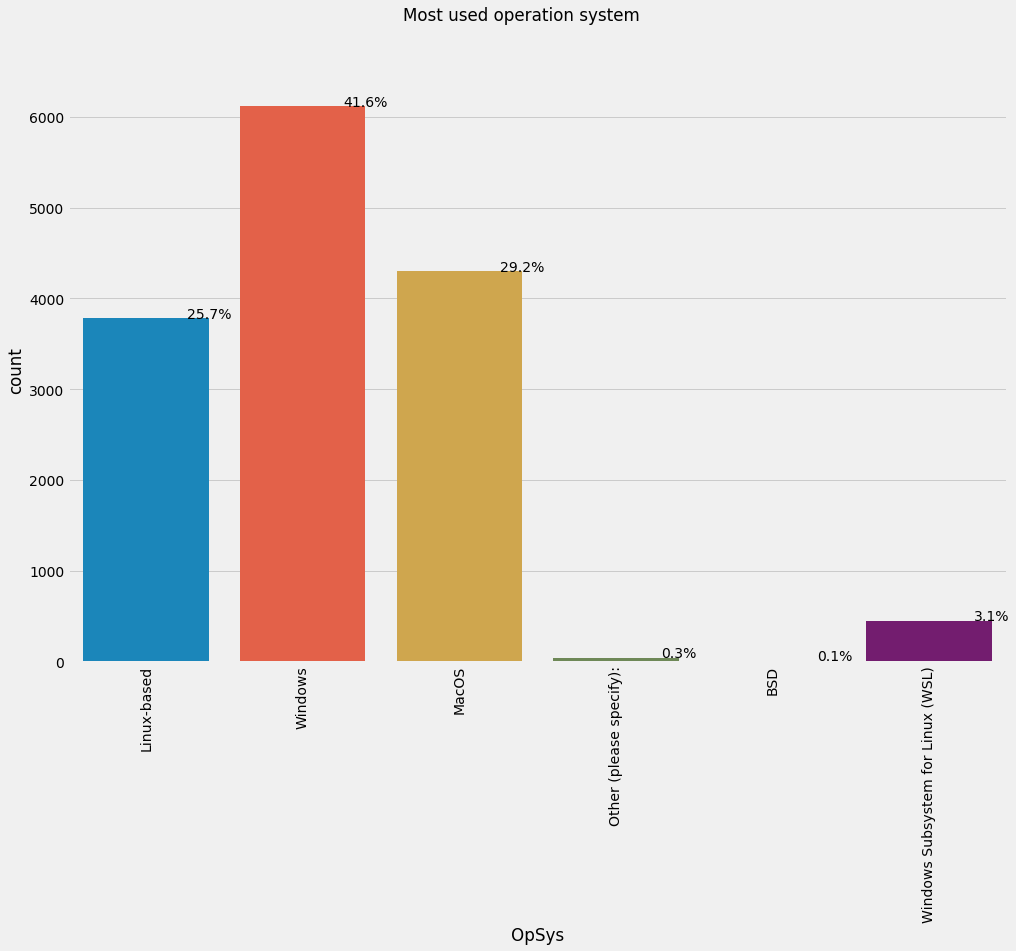

In [452]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='OpSys', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used operation system')
plt.xticks(rotation=90)
plt.show()

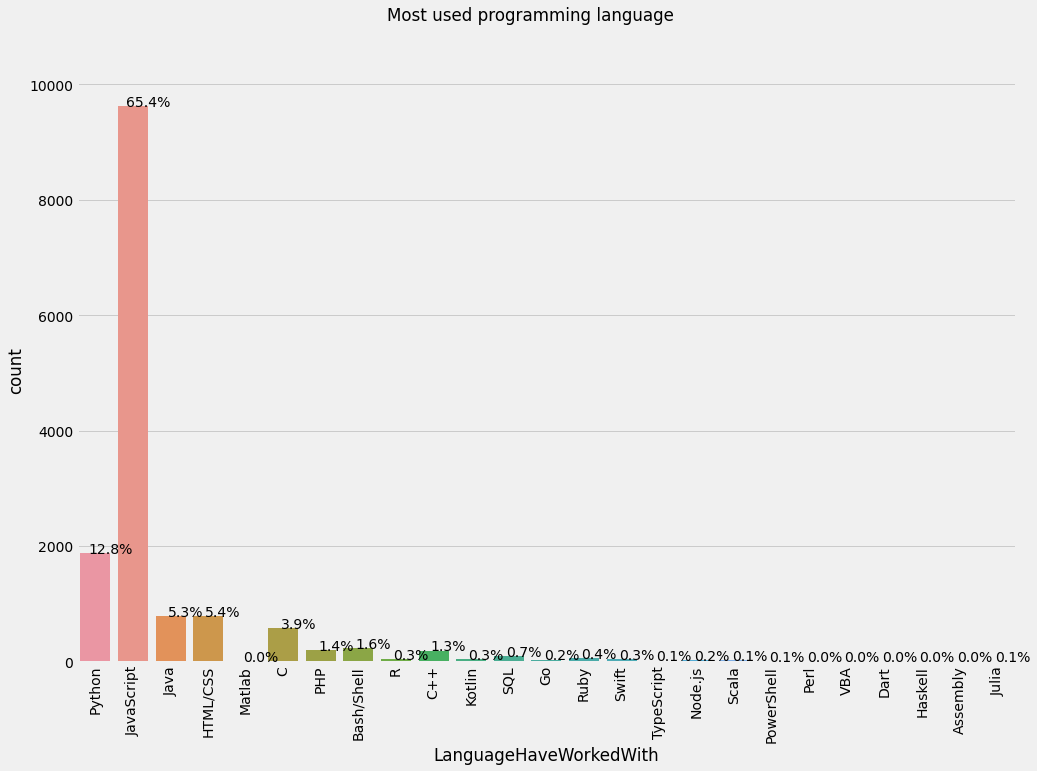

In [447]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='LanguageHaveWorkedWith', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used programming language')
plt.xticks(rotation=90)
plt.show()

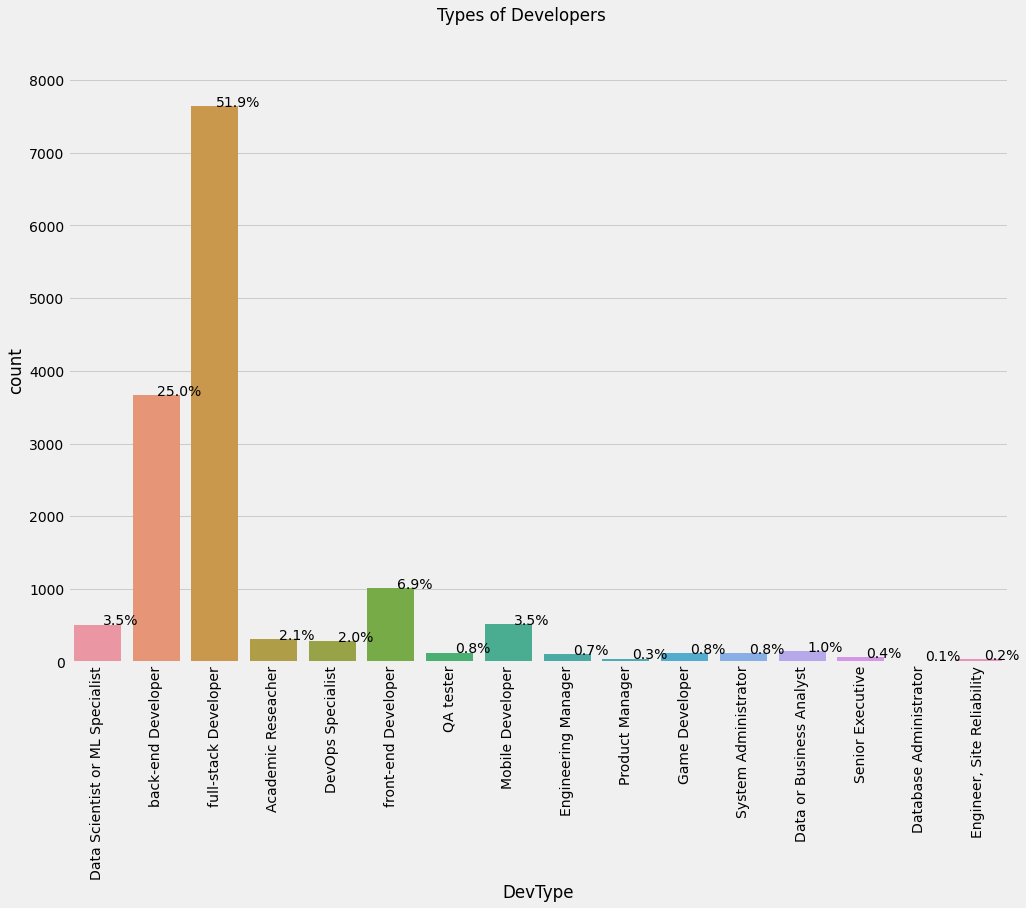

In [448]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='DevType', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Types of Developers')
plt.xticks(rotation=90)
plt.show()

In [449]:
dev_salary = df[['DevType', 'Salary']].pivot_table(index='DevType', values=['Salary'], aggfunc='median')

In [450]:
dev_salary.sort_values(by='Salary', ascending=False)

,Salary
DevType,
Senior Executive,91967.5
"Engineer, Site Reliability",90482.0
Engineering Manager,86478.0
Product Manager,64859.0
DevOps Specialist,58373.0
back-end Developer,55596.0
Data Scientist or ML Specialist,54049.0
full-stack Developer,53184.0
Database Administrator,52593.5


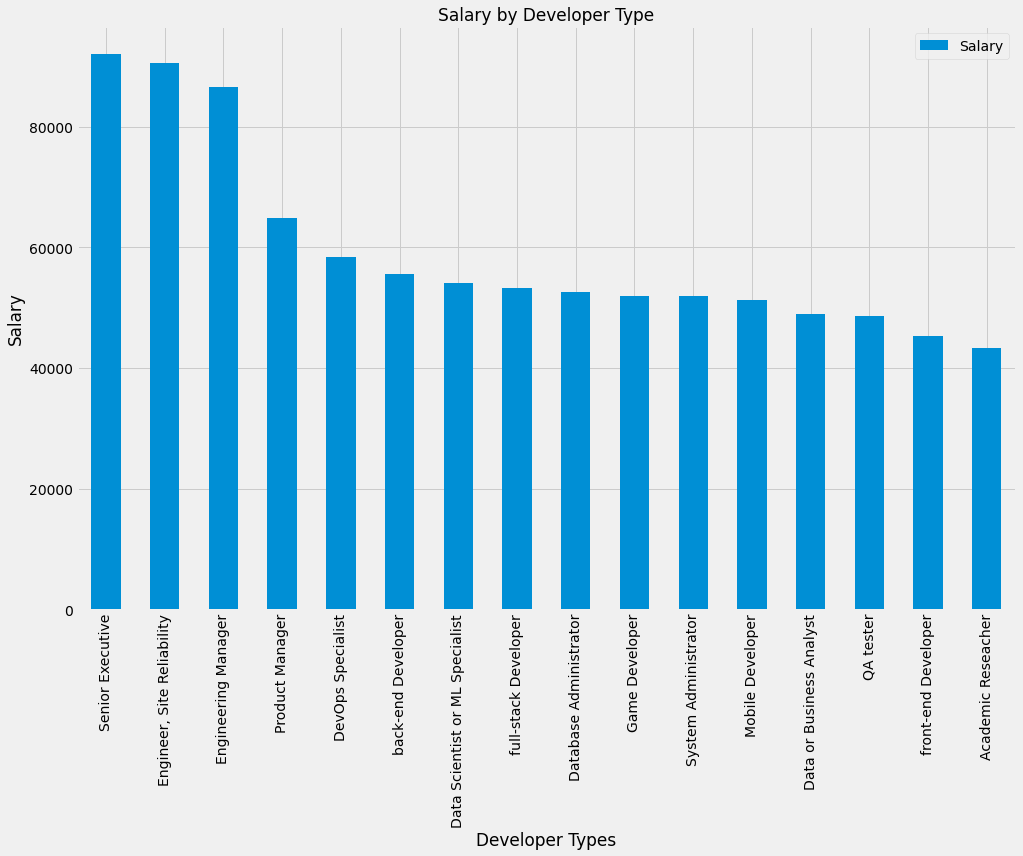

In [451]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = dev_salary.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Developer Type', size=17)
plt.xlabel('Developer Types', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

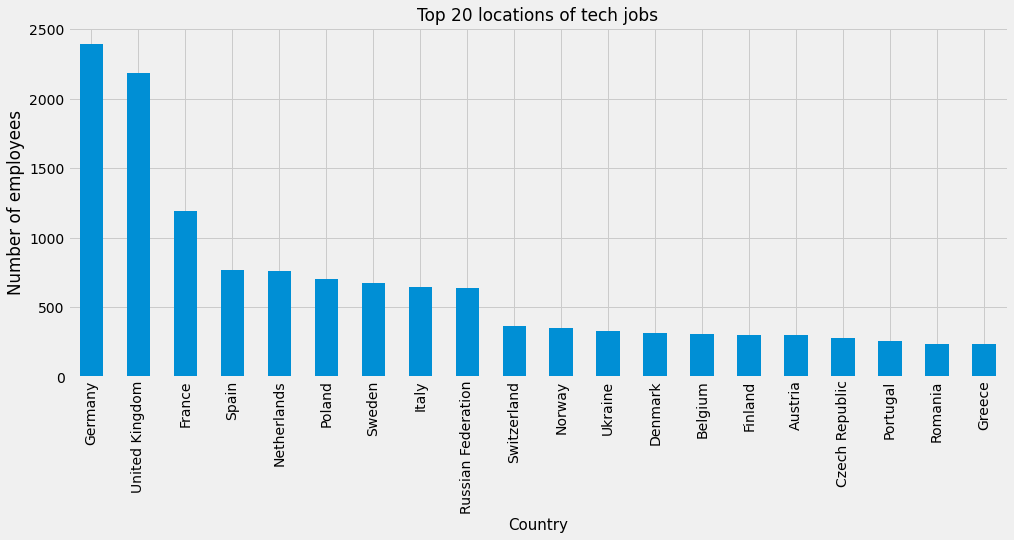

In [453]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')
location = df['Country'].value_counts().iloc[:20].plot.bar()
plt.title('Top 20 locations of tech jobs', size=17)
plt.xlabel('Country', size=15)
plt.ylabel('Number of employees')
plt.show();

In [454]:
df.shape

(14708, 11)

In [455]:
salary_by_country = df[['Country', 'Salary']].pivot_table(index='Country', values=['Salary'], aggfunc='median')

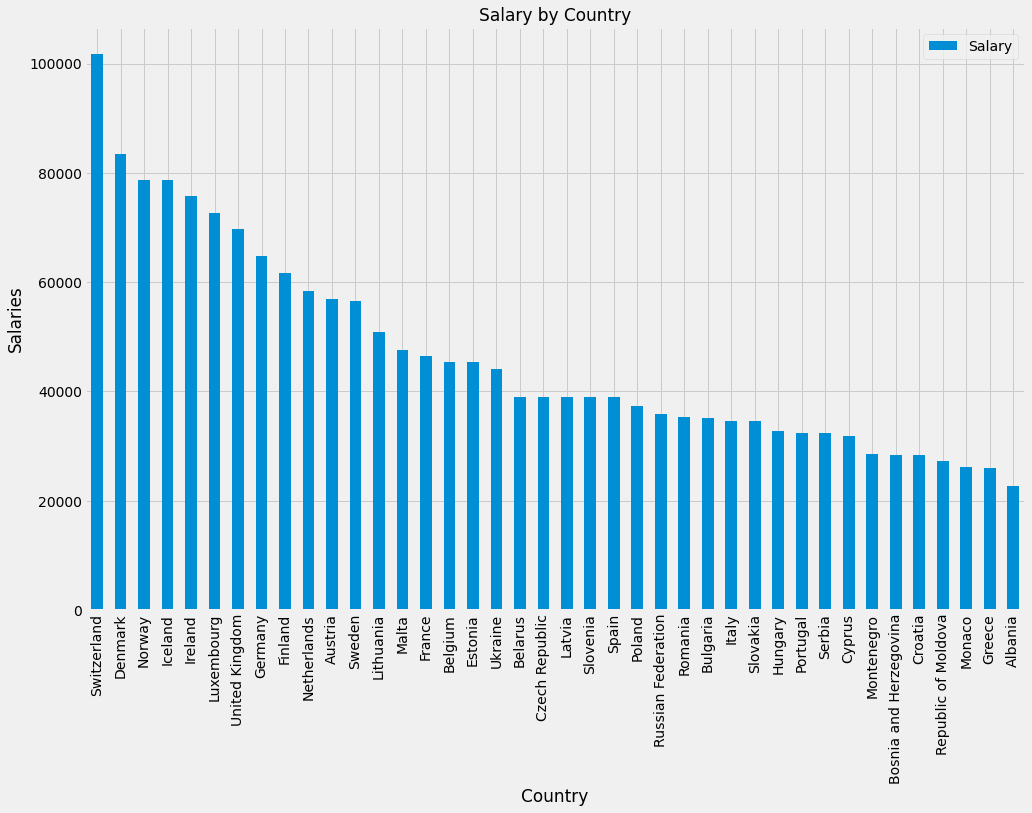

In [456]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_country.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Country', size=17)
plt.xlabel('Country', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

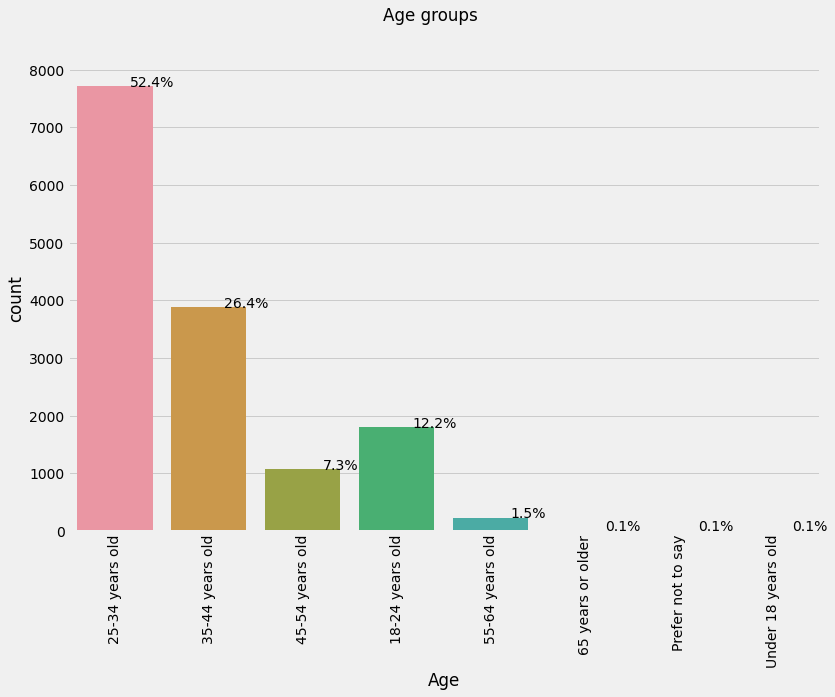

In [457]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='Age', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Age groups')
plt.xticks(rotation=90)
plt.show()

In [458]:
salary_by_age = df[['Age', 'Salary']].pivot_table(index='Age', values=['Salary'], aggfunc='median')

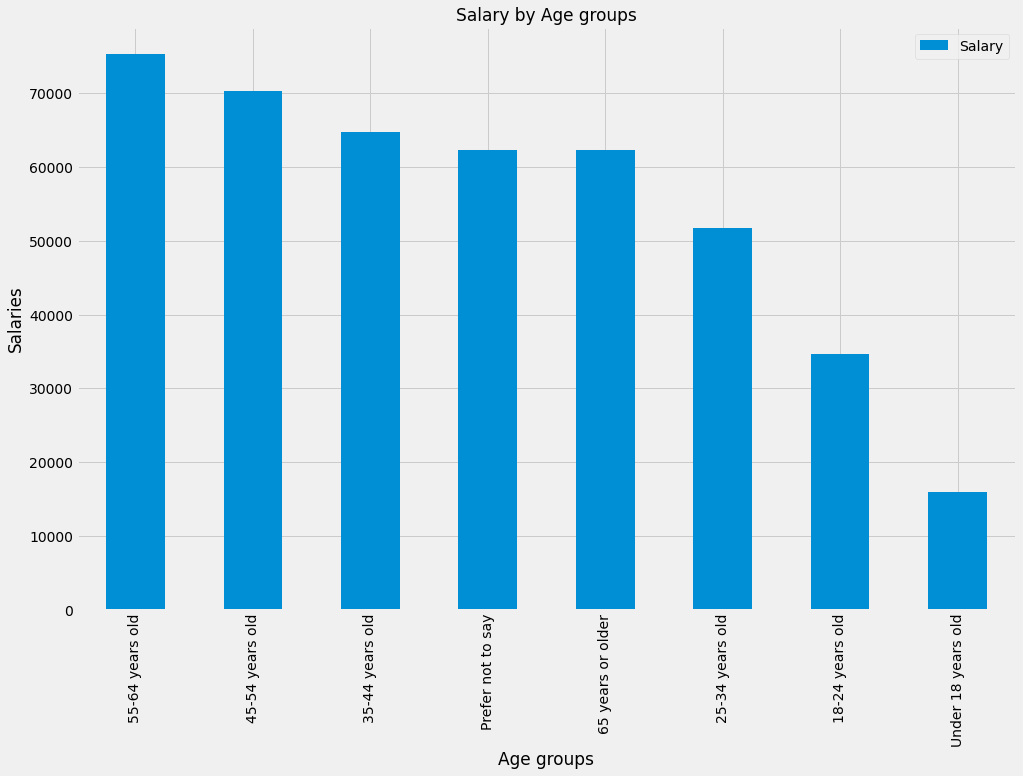

In [459]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_age.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Age groups', size=17)
plt.xlabel('Age groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

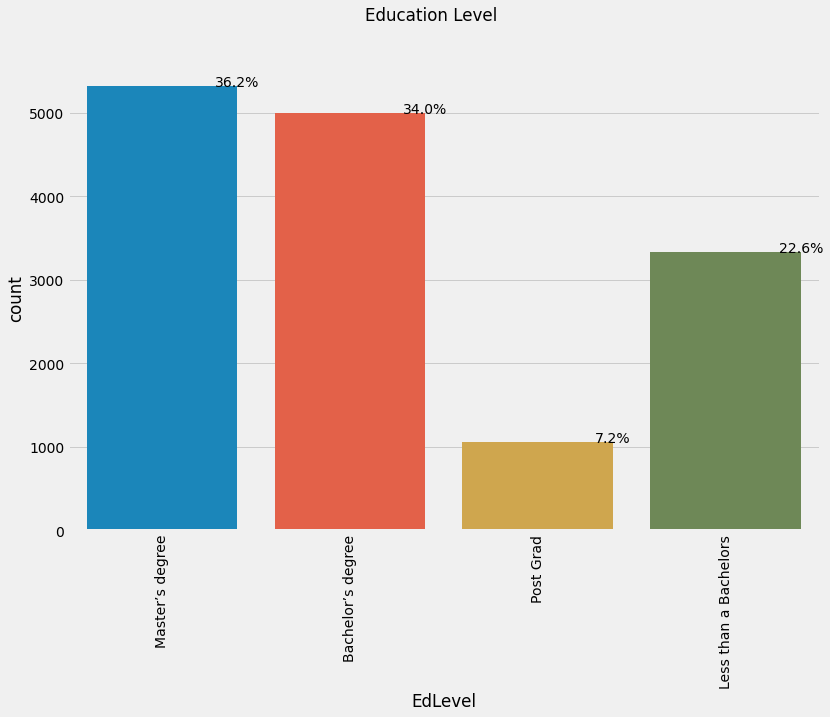

In [460]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='EdLevel', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Education Level')
plt.xticks(rotation=90)
plt.show()

In [461]:
edu_sal=  df[['EdLevel', 'Salary']].pivot_table(index='EdLevel', values=['Salary'], aggfunc='median')

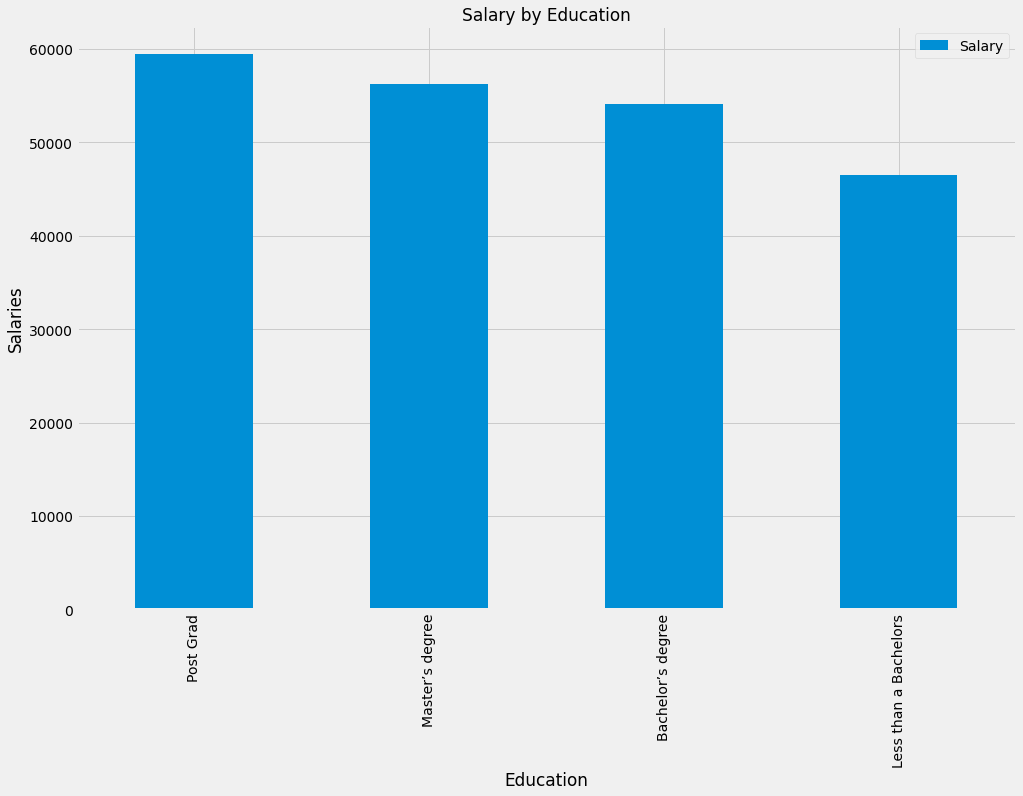

In [462]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = edu_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Education', size=17)
plt.xlabel('Education', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

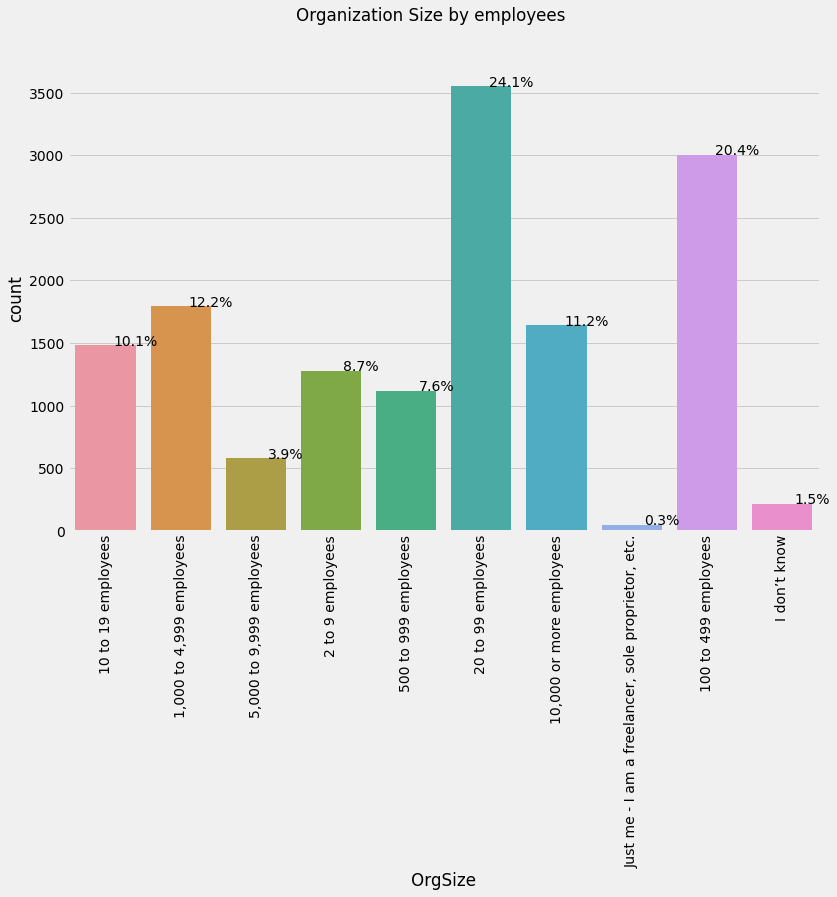

In [463]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='OrgSize', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Organization Size by employees')
plt.xticks(rotation=90)
plt.show()

In [464]:
org_sal=  df[['OrgSize', 'Salary']].pivot_table(index='OrgSize', values=['Salary'], aggfunc='median')

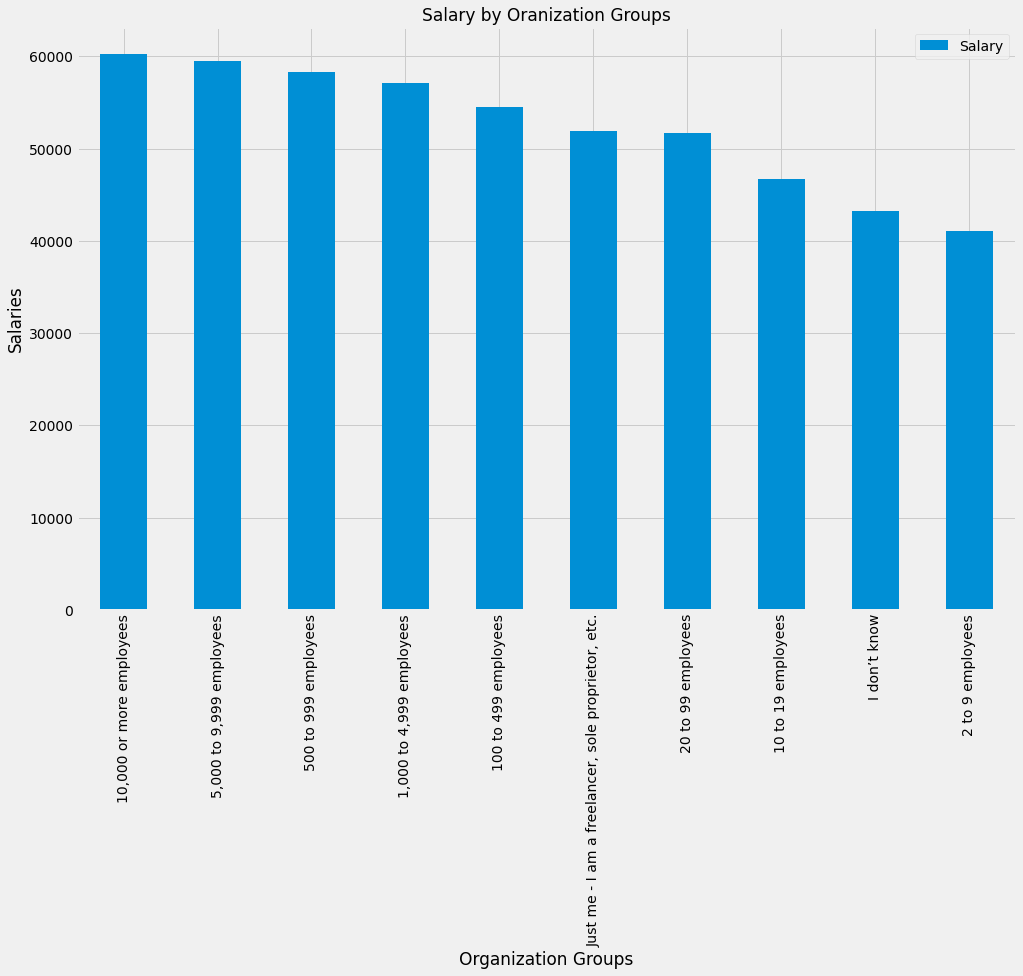

In [465]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = org_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Oranization Groups', size=17)
plt.xlabel('Organization Groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

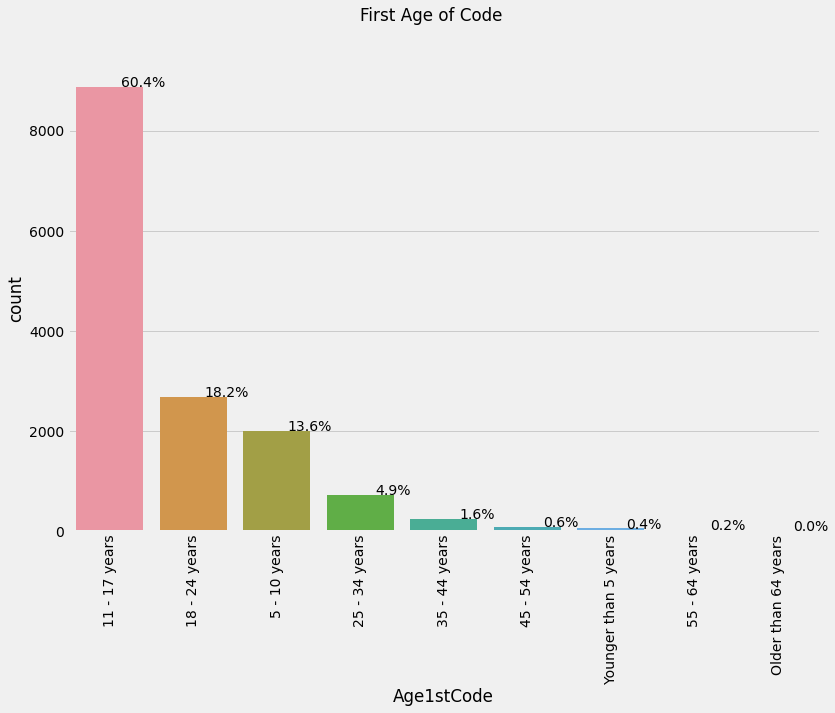

In [466]:
plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='Age1stCode', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('First Age of Code')
plt.xticks(rotation=90)
plt.show()

In [467]:
Age_of_Code = df[['Age1stCode', 'Salary']].pivot_table(index='Age1stCode', values=['Salary'], aggfunc='median')

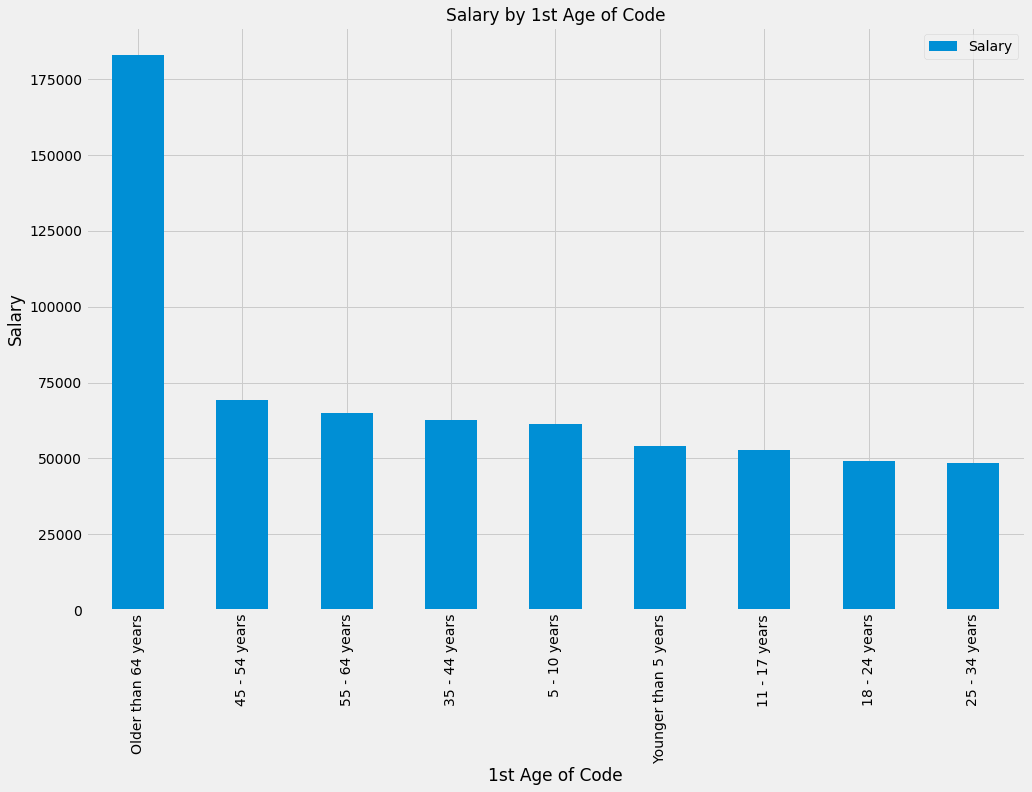

In [468]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = Age_of_Code.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by 1st Age of Code', size=17)
plt.xlabel('1st Age of Code', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [469]:
salary_by_exper = df[['YearsCodePro', 'Salary']].pivot_table(index='YearsCodePro', values=['Salary'], aggfunc='median')

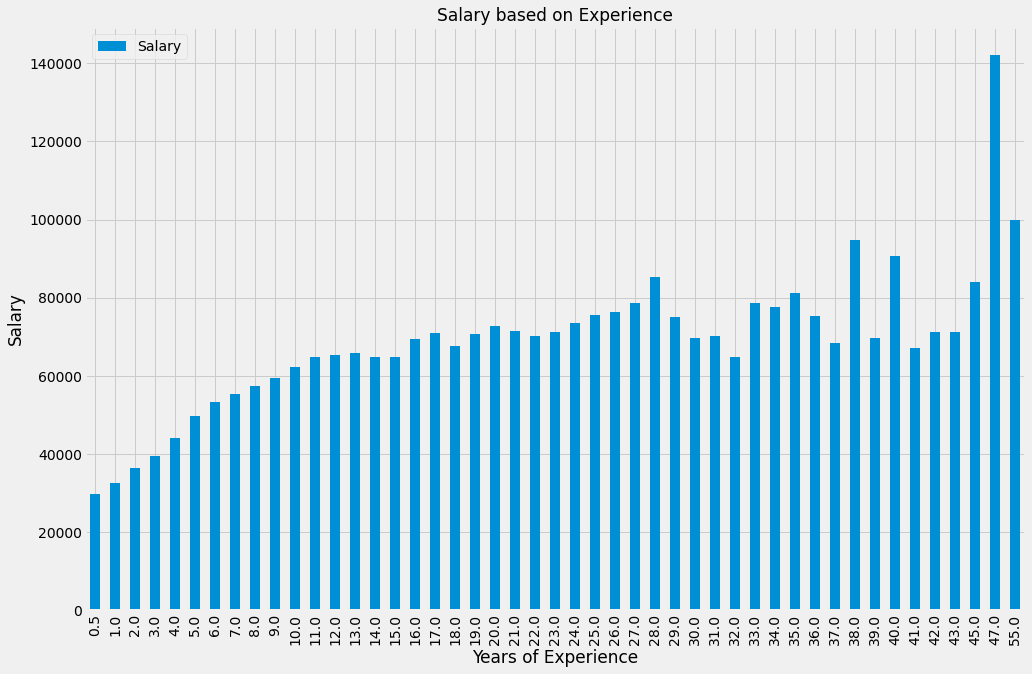

In [470]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_exper.plot(kind='bar')
plt.title('Salary based on Experience', size=17)
plt.xlabel('Years of Experience', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [471]:
df.columns

Index(['EdLevel', 'Country', 'YearsCodePro', 'Employment', 'Age', 'Age1stCode',
       'DevType', 'LanguageHaveWorkedWith', 'OrgSize', 'OpSys', 'Salary'],
      dtype='object')

In [472]:
df = df.drop("Employment", axis=1)

In [473]:
from sklearn.preprocessing import LabelEncoder

In [474]:
le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])

In [475]:
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])

In [476]:
le_coun = LabelEncoder()
df['Country'] = le_coun.fit_transform(df['Country'])

In [477]:
le_dev = LabelEncoder()
df['DevType'] = le_dev.fit_transform(df['DevType'])

In [478]:
le_op_sys = LabelEncoder()
df['OpSys'] = le_op_sys.fit_transform(df['OpSys'])

In [479]:
le_org_size = LabelEncoder()
df['OrgSize'] = le_org_size.fit_transform(df['OrgSize'])

In [481]:
le_age_1stcode = LabelEncoder()
df['Age1stCode'] = le_age_1stcode.fit_transform(df['Age1stCode'])

In [482]:
le_prog_lang = LabelEncoder()
df['LanguageHaveWorkedWith'] = le_prog_lang.fit_transform(df['LanguageHaveWorkedWith'])

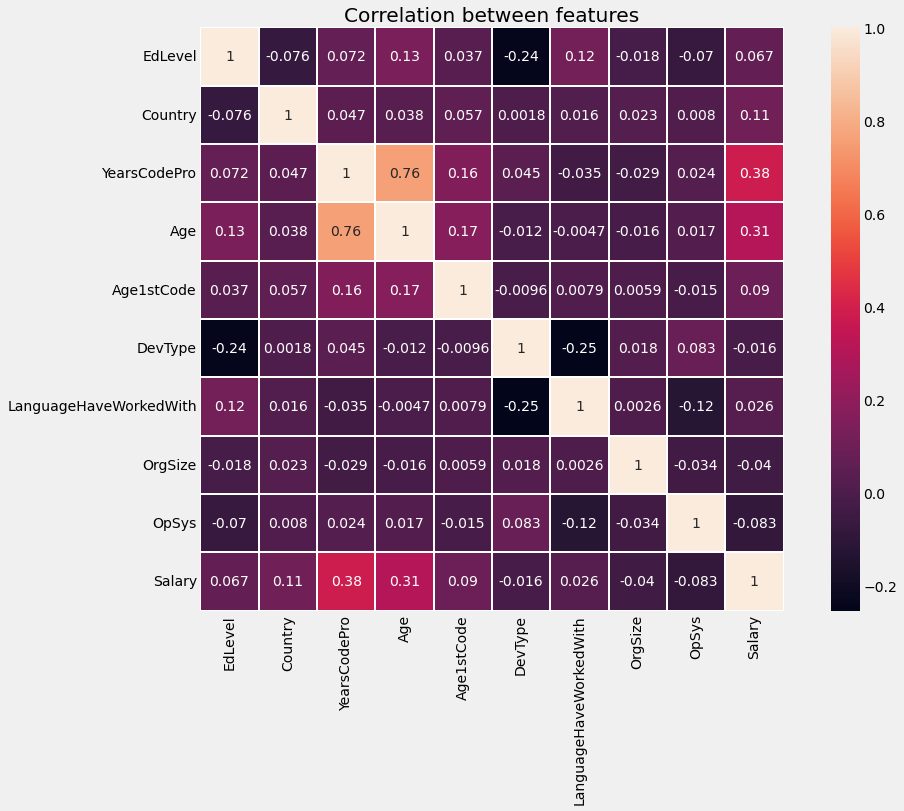

In [483]:
corr=df.corr()

sns.heatmap(corr, linewidths=0.01,
            square=True,annot=True)
plt.title('Correlation between features');

In [484]:
df = df.drop(['Age1stCode'], axis=1)
df = df.drop(['OrgSize'], axis=1)
df = df.drop(['OpSys'], axis=1)
df = df.drop(['LanguageHaveWorkedWith'], axis=1)


In [486]:
df.head()

,EdLevel,Country,YearsCodePro,Age,DevType,Salary
9,2,36,4.0,1,1,51552.0
11,0,35,5.0,1,13,46482.0
12,2,13,6.0,1,13,77290.0
23,2,12,2.0,1,1,38915.0
24,2,13,18.0,2,15,77831.0


In [488]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [489]:
X

,EdLevel,Country,YearsCodePro,Age,DevType
9,2,36,4.0,1,1
11,0,35,5.0,1,13
12,2,13,6.0,1,13
23,2,12,2.0,1,1
24,2,13,18.0,2,15
...,...,...,...,...,...
83409,3,25,6.0,1,13
83419,2,1,13.0,2,15
83420,2,12,4.0,1,15
83424,0,13,12.0,1,15


In [490]:
from sklearn.model_selection import train_test_split

In [491]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [492]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, cross_val_predict

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [494]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

In [497]:
model_rf = RandomForestRegressor(random_state=42,
                            n_estimators=600,                        
                            max_depth=150,                        
                            bootstrap=True,
                            max_features='sqrt')
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42,
                           splitter='random',                      
                            max_depth=150,
                           max_leaf_nodes=100,
                           max_features='sqrt')
model_gb = GradientBoostingRegressor(random_state=42,
                            n_estimators=600,                        
                            max_depth=150,                        
                           max_features='sqrt')
model_nn = MLPRegressor(random_state=1, max_iter=400, hidden_layer_sizes=(250))
model_svm = SVR()
model_nb = GaussianNB()
model_knn = KNeighborsRegressor()

In [498]:
model_rf.fit(X_train.values,y_train.values)
model_lr.fit(X_train.values, y_train.values)
model_dt.fit(X_train.values, y_train.values)
model_gb.fit(X_train.values, y_train.values)
model_nn.fit(X_train.values, y_train.values)
model_svm.fit(X_train.values, y_train.values)
model_nb.fit(X_train.values, y_train.values)
model_knn.fit(X_train.values, y_train.values)

/home/noob/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


KNeighborsRegressor()

In [504]:
pred_rf = model_rf.predict(X_test.values) 
pred_lr =  model_lr.predict(X_test.values)
pred_dt = model_dt.predict(X_test.values)
pred_gb =  model_gb.predict(X_test.values)
pred_nn = model_nn.predict(X_test.values)
pred_svm =  model_svm.predict(X_test.values)
pred_nb =  model_nb.predict(X_test.values)
pred_knn = model_knn.predict(X_test.values)

In [553]:
print ("RMSE rf: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_rf)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_rf),2)))
print ("RMSE lr: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_lr)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_lr),2)))
print ("RMSE dt: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_dt)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_dt),2)))
print ("RMSE gb: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_gb)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_gb),2)))
print ("RMSE nn: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_nn)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_nn),2)))
print ("RMSE svm: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_svm)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_svm),2)))
print ("RMSE nb: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_nb)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_nb),2)))
print ("RMSE knn: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_knn)),2)))
print("R_squared: " + str(round(r2_score(y_test.values,pred_knn),2)))

RMSE rf: $25107.69
R_squared: 0.36
RMSE lr: $28522.5
R_squared: 0.17
RMSE dt: $29157.16
R_squared: 0.13
RMSE gb: $26890.04
R_squared: 0.26
RMSE nn: $28860.35
R_squared: 0.15
RMSE svm: $31466.46
R_squared: -0.01
RMSE nb: $38356.13
R_squared: -0.5
RMSE knn: $26036.32
R_squared: 0.31


In [547]:
cv_rf = cross_val_predict(model_rf, X, y.values, cv=10,)
cv_lr = cross_val_predict(model_lr, X, y.values, cv=10,)
cv_dt = cross_val_predict(model_dt, X, y.values, cv=10,)
cv_gb = cross_val_predict(model_gb, X, y.values, cv=10,)
cv_nn = cross_val_predict(model_nn, X, y.values, cv=10,)
cv_svm = cross_val_predict(model_svm, X, y.values, cv=10,)
cv_nb = cross_val_predict(model_nb, X, y.values, cv=10,)
cv_knn = cross_val_predict(model_knn, X, y.values, cv=10,)

/home/noob/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/noob/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/noob/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/noob/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/noob/anaco

In [552]:
print ("RMSE cv_rf: $" + str(round(sqrt(mean_squared_error(y.values, cv_rf)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_rf),2)))
print ("RMSE cv_lr: $" + str(round(sqrt(mean_squared_error(y.values, cv_lr)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_lr),2)))
print ("RMSE cv_dt: $" + str(round(sqrt(mean_squared_error(y.values, cv_dt)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_dt),2)))
print ("RMSE cv_gb: $" + str(round(sqrt(mean_squared_error(y.values, cv_gb)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_gb),2)))
print ("RMSE cv_nn: $" + str(round(sqrt(mean_squared_error(y.values, cv_nn)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_nn),2)))
print ("RMSE cv_svm: $" + str(round(sqrt(mean_squared_error(y.values, cv_svm)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_svm),2)))
print ("RMSE cv_nb: $" + str(round(sqrt(mean_squared_error(y.values, cv_nb)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_nb),2)))
print ("RMSE cv_knn: $" + str(round(sqrt(mean_squared_error(y.values, cv_knn)),2)))
print("R_squared: " + str(round(r2_score(y.values,cv_knn),2)))

RMSE cv_rf: $25996.16
R_squared: 0.34
RMSE cv_lr: $29352.85
R_squared: 0.16
RMSE cv_dt: $29317.08
R_squared: 0.16
RMSE cv_gb: $27771.67
R_squared: 0.24
RMSE cv_nn: $29749.22
R_squared: 0.13
RMSE cv_svm: $32249.84
R_squared: -0.02
RMSE cv_nb: $41743.16
R_squared: -0.71
RMSE cv_knn: $26982.55
R_squared: 0.29


In [174]:
Xn = np.array([["Master’s degree", "Switzerland",  5, "35-44 years old", "Data Scientist or ML Specialist" ]])

In [175]:
Xn

array([['Master’s degree', 'Switzerland', '5', '35-44 years old',
        'Data Scientist or ML Specialist']], dtype='<U31')

In [176]:
Xn[:, 0] = le_ed.transform(Xn[:,0])
Xn[:, 1] = le_coun.transform(Xn[:,1])
Xn[:, 3] = le_age.transform(Xn[:,3])
Xn[:, 4] = le_dev.transform(Xn[:,4])
Xn = Xn.astype(float)
Xn

array([[ 2., 37.,  5.,  2.,  1.]])

In [177]:
y_pred_k = rfr1.predict(Xn)
y_pred_k

array([113241.68126587])

In [178]:
import pickle

In [179]:
rfmod = {"model":rfr1, "le_coun":le_coun, "le_ed":le_ed, "le_age":le_age, "le_dev":le_dev}
with open('salary_mod2.pkl', 'wb') as file1:
    pickle.dump(rfmod, file1)

In [180]:
with open('salary_mod2.pkl', 'rb') as file1:
    momo = pickle.load(file1)
    
rf = momo["model"]
le_coun = momo["le_coun"]
le_ed = momo["le_ed"]
le_age = momo["le_age"]
le_dev = momo["le_dev"]

In [181]:
os.getcwd()

'/home/noob/Desktop/streamlit/new proj'

In [182]:
val_test = rf.predict(Xn)
val_test

array([113241.68126587])